In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
df=pd.read_csv('zomato.csv',encoding='latin-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [63]:
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [64]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


1. Missing value Hunt
2. Explore the numerical variable
3. Explore catagorical variable
4. Finding Relationship

In [65]:
df.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


In [66]:
[features for features in df.columns if df[features].isnull().sum()>0]

['Cuisines']

 **OBSERVATION:**
Only Cusinies Column has 9 Null Values.

<Axes: >

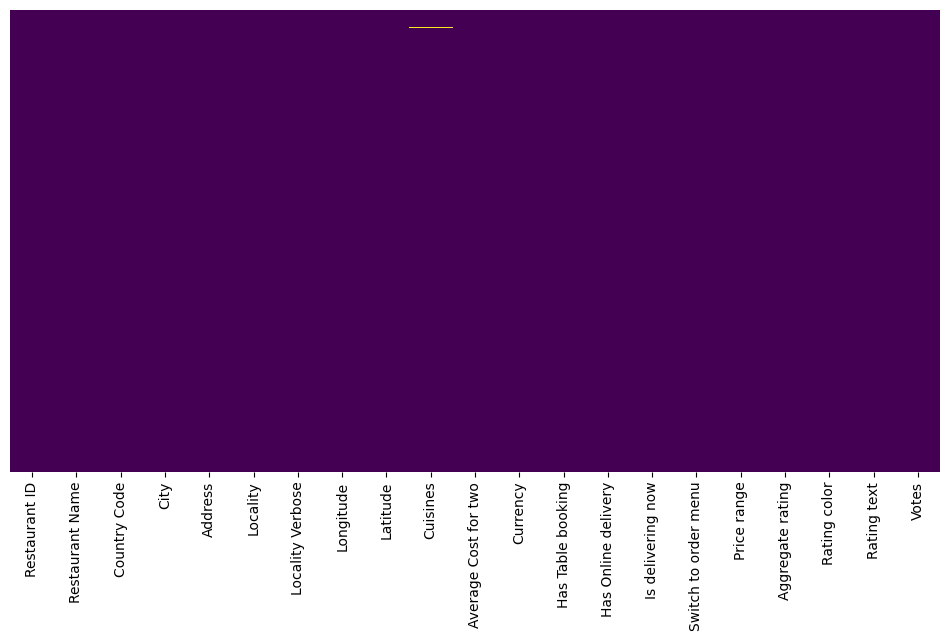

In [67]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [68]:
df_country=pd.read_excel('Country-Code.xlsx')
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [69]:
df_final=pd.merge(df,df_country,on='Country Code',how='left')
df_final.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [70]:
df_final.dtypes

,0
Restaurant ID,int64
Restaurant Name,object
Country Code,int64
City,object
Address,object
Locality,object
Locality Verbose,object
Longitude,float64
Latitude,float64
Cuisines,object


In [71]:
df_final.Country.value_counts()

,count
Country,
India,8652
United States,434
United Kingdom,80
Brazil,60
South Africa,60
UAE,60
New Zealand,40
Turkey,34
Australia,24


In [72]:
country=df_final.Country.value_counts().index
country_val=df_final.Country.value_counts().values
country_val

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4])

([<matplotlib.patches.Wedge at 0x7d41b6218b30>,
 [Text(-1.0522561700723039, 0.32055725314640227, 'India'),
  Text(0.9911331050301793, -0.4771322333622366, 'United States'),
  Text(1.057285832834238, -0.30355669600259505, 'United Kingdom'),
  Text(1.0701388534934553, -0.2545640081467003, 'Brazil'),
  Text(1.0793507650271223, -0.2121365740162827, 'South Africa'),
  Text(1.086881175607599, -0.16937919030932916, 'UAE'),
  Text(1.0918636626261928, -0.13354303514790955, 'New Zealand'),
  Text(1.094790433001231, -0.10692945248610065, 'Turkey'),
  Text(1.0966310607987864, -0.08602509221924036, 'Australia'),
  Text(1.097807123683944, -0.06942275699499531, 'Phillipines'),
  Text(1.098679169865659, -0.053889532409427066, 'Indonesia'),
  Text(1.0993059904136664, -0.03906839439531931, 'Qatar'),
  Text(1.0997248602793597, -0.02460145693943169, 'Singapore'),
  Text(1.0999533477346455, -0.010130785129799997, 'Sri Lanka'),
  Text(1.0999990483203896, -0.001446960344028858, 'Canada')])

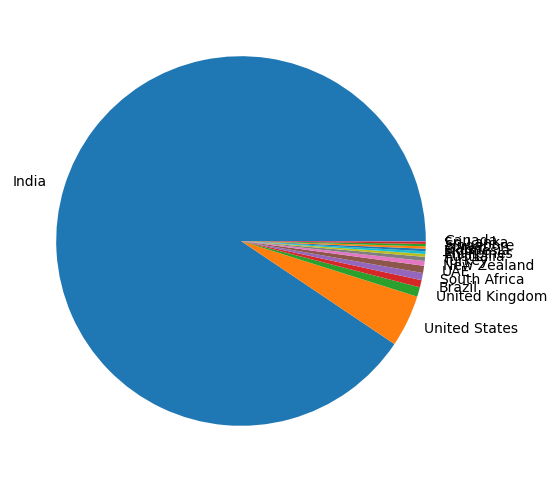

In [73]:
#pie chart
plt.pie(country_val,labels=country)

([<matplotlib.patches.Wedge at 0x7d41b622d310>,
 [Text(-1.082974277862112, 0.1927867046480056, 'India'),
  Text(1.0772816964394372, -0.22240536530526556, 'United States'),
  Text(1.0995865232164619, -0.030157552300104404, 'United Kingdom')],
 [Text(-0.5907132424702428, 0.10515638435345759, '94.39%'),
  Text(0.5876081980578747, -0.12131201743923574, '4.73%'),
  Text(0.5997744672089791, -0.01644957398187513, '0.87%')])

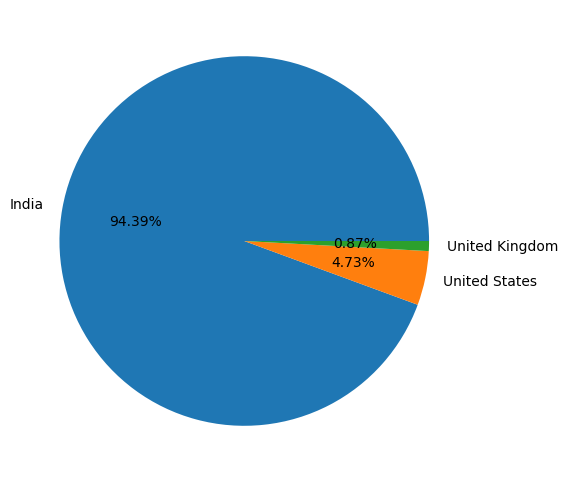

In [74]:
plt.pie(country_val[:3],labels=country[:3],autopct='%1.2f%%')

OBSERVATION : INDIA has the biggest customer base. Then US and then UK.


In [75]:
df_final.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [76]:
ratings=df_final.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [77]:
ratings.head()

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

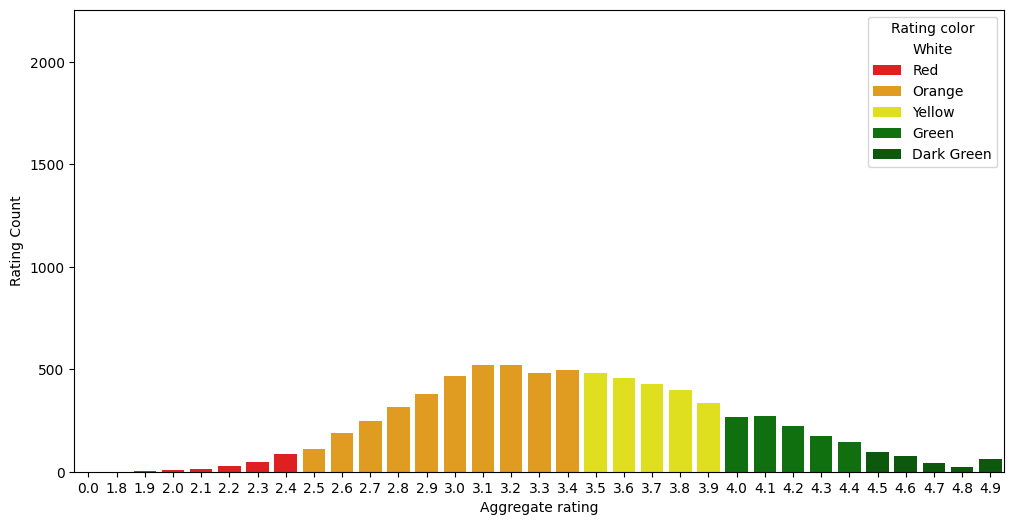

In [78]:
#mapping color

plt.rcParams['figure.figsize']=(12,6)
sns.barplot(x='Aggregate rating',y='Rating Count',data=ratings,hue='Rating color',palette=['white','red','orange','yellow','green','darkgreen'])

OBSERATION:

1. good distributed data
2. No rating is very high
3. significant amount is in 2.5 to 3.4




/tmp/ipython-input-2584817026.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating color',data=ratings,palette=['white','red','orange','yellow','green','darkgreen'])


<Axes: xlabel='Rating color', ylabel='count'>

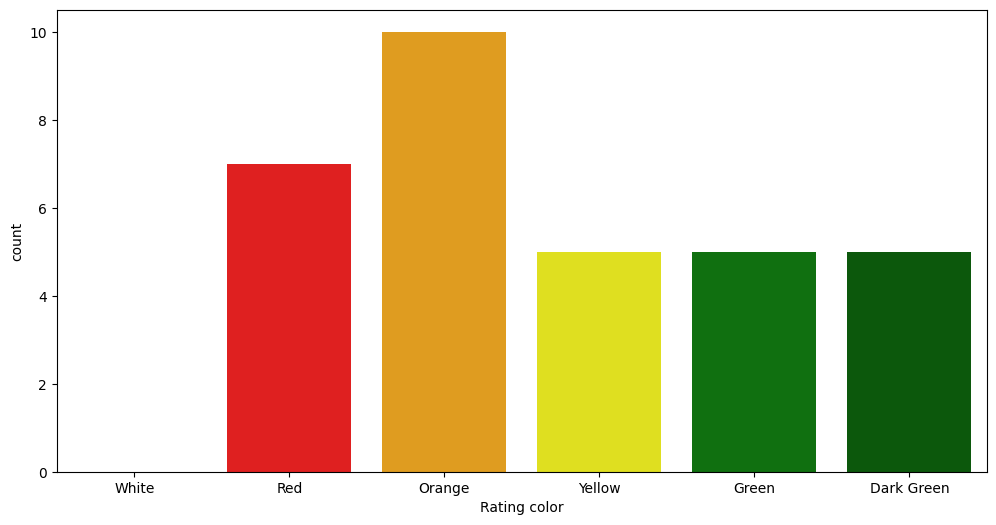

In [79]:
## count plot
sns.countplot(x='Rating color',data=ratings,palette=['white','red','orange','yellow','green','darkgreen'])

### Find the countries name that has given 0 rating

In [80]:
zero_rating = df_final.groupby(['Aggregate rating','Country']).size().reset_index()
zero_rating.head()

,Aggregate rating,Country,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3
4,1.8,India,1


In [81]:
zero_rating_country=zero_rating[(zero_rating['Aggregate rating'] == 0)]
zero_rating_country

,Aggregate rating,Country,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3


**Another way of Execution**

In [82]:
 df_final[df_final['Aggregate rating']==0].groupby('Country').size().reset_index()

,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


## **which** country has online delivery


In [83]:
df_final[df_final['Has Online delivery']=='Yes'].groupby('Country').size().reset_index()

,Country,0
0,India,2423
1,UAE,28


In [84]:
df_final[df_final['Has Online delivery']=='Yes'].groupby('Country').size().reset_index()

,Country,0
0,India,2423
1,UAE,28


In [85]:
df_final[['Has Online delivery','Country']]

,Has Online delivery,Country
0,No,Phillipines
1,No,Phillipines
2,No,Phillipines
3,No,Phillipines
4,No,Phillipines
...,...,...
9546,No,Turkey
9547,No,Turkey
9548,No,Turkey
9549,No,Turkey


Observation: INDIA and UAE has online delieveries



Create Pie chart for cities distribution

In [86]:
df_final.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [87]:
city=df_final.City.value_counts().index
city

Index(['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad',
       'Bhubaneshwar', 'Lucknow', 'Ahmedabad', 'Amritsar', 'Guwahati',
       ...
       'Forrest', 'East Ballina', 'Huskisson', 'Inverloch', 'Lakeview',
       'Lakes Entrance', 'Mohali', 'Panchkula', 'Bandung', 'Randburg'],
      dtype='object', name='City', length=141)

In [88]:
city_values=df_final.City.value_counts().values
city_values

array([5473, 1118, 1080,  251,   25,   21,   21,   21,   21,   21,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         18,   18,   16,   14,   11,    6,    4,    4,    3,    3,    2,
          2,    2,    2,    2,    2,    2,    2,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1])

([<matplotlib.patches.Wedge at 0x7d41b55137a0>,
 [Text(-0.6145353730323401, 0.9123301350344637, 'New Delhi'),
  Text(0.06236774886414425, -1.0982305149200777, 'Gurgaon'),
  Text(0.878904221413572, -0.6614585169014024, 'Noida'),
  Text(1.0922218482114119, -0.1305811406354216, 'Faridabad'),
  Text(1.099946277419523, -0.010871374841004297, 'Ghaziabad')])

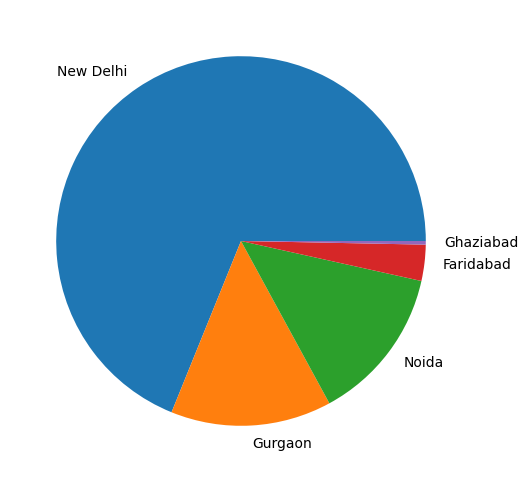

In [89]:
plt.pie(city_values[:5],labels=city[:5])

**WHICH ARE THE TOP 10 CUISINES**


In [90]:
top_10_cuisine=df_final.Cuisines.value_counts().index
top_10_cuisine_count=df_final.Cuisines.value_counts().values
top_10_cuisine
top_10_cuisine_count

array([936, 511, 354, ...,   1,   1,   1])

In [91]:
table_for_top_10_cuisine={'Cuisines': top_10_cuisine[:10], 'Frequency': top_10_cuisine_count[:10]}
table_for_top_10_cuisine=pd.DataFrame(table_for_top_10_cuisine)
table_for_top_10_cuisine

,Cuisines,Frequency
0,North Indian,936
1,"North Indian, Chinese",511
2,Chinese,354
3,Fast Food,354
4,"North Indian, Mughlai",334
5,Cafe,299
6,Bakery,218
7,"North Indian, Mughlai, Chinese",197
8,"Bakery, Desserts",170
9,Street Food,149


# The following Code gives individual cuisine

In [92]:
cuisine_counts = df['Cuisines'].str.split(',').explode().str.strip().value_counts()

top_10_cuisines = cuisine_counts.head(10)

top_10_cuisines


,count
Cuisines,
North Indian,3960
Chinese,2735
Fast Food,1986
Mughlai,995
Italian,764
Bakery,745
Continental,736
Cafe,703
Desserts,653
